# 1. Задание #

## 1.1. Решите задачу двухклассовой классификации, обучив модель на данных в data.csv После обучения вы должны получить вероятность принадлежности каждого объекта к таргет, равному единице 1. ##

In [124]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
import pickle as p
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer as token
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import xgboost

In [47]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [9]:
df = pd.read_csv('data.csv', sep = ';')

In [17]:
df = df.dropna()

C:\Users\maxim\AppData\Local\Temp\ipykernel_13416\3742010712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=[green, red])


<Axes: xlabel='target', ylabel='count'>

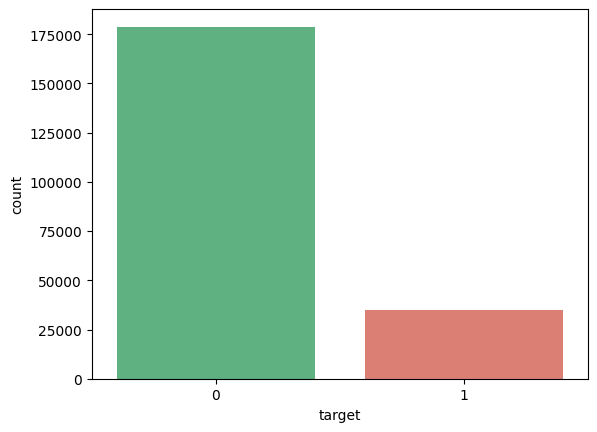

In [18]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x=df['target'], palette=[green, red])

In [86]:
y = df['target']
df = df.drop(columns = ['target'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (149748, 125)
Shape of Validation  (64179, 125)


In [89]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=700)

In [90]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [91]:
y_predrfc = rfc.predict(X_test)

In [92]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=10,
                                      n_estimators=500,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

In [93]:
eval_set = [(X_test, y_test)]

In [94]:
model_xgboost.fit(X_train,
                          y_train,
                          early_stopping_rounds=100,
                          eval_set=eval_set,
                          verbose=True)

C:\Users\maxim\anaconda3\envs\py10\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.72738
[1]	validation_0-auc:0.76600
[2]	validation_0-auc:0.76940
[3]	validation_0-auc:0.76955
[4]	validation_0-auc:0.77798
[5]	validation_0-auc:0.78030
[6]	validation_0-auc:0.78326
[7]	validation_0-auc:0.78321
[8]	validation_0-auc:0.78391
[9]	validation_0-auc:0.78498
[10]	validation_0-auc:0.78593
[11]	validation_0-auc:0.78643
[12]	validation_0-auc:0.78701
[13]	validation_0-auc:0.78695
[14]	validation_0-auc:0.78740
[15]	validation_0-auc:0.78814
[16]	validation_0-auc:0.78829
[17]	validation_0-auc:0.78859
[18]	validation_0-auc:0.78865
[19]	validation_0-auc:0.78883
[20]	validation_0-auc:0.78918
[21]	validation_0-auc:0.78906
[22]	validation_0-auc:0.78899
[23]	validation_0-auc:0.78928
[24]	validation_0-auc:0.78938
[25]	validation_0-auc:0.78938
[26]	validation_0-auc:0.78932
[27]	validation_0-auc:0.78956
[28]	validation_0-auc:0.78957
[29]	validation_0-auc:0.78962
[30]	validation_0-auc:0.78992
[31]	validation_0-auc:0.78996
[32]	validation_0-auc:0.79015
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
y_predxgb = model_xgboost.predict(X_test)

In [125]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [126]:
y_predlogreg = logreg.predict(X_test)

## 1.2. Сгруппируйте выборку по значениям вероятности с шагом 0.1, и в каждой группе посчитайте: сколько объектов в группе, сколько в группе объектов с target = 1. ##

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213927 entries, 0 to 255819
Columns: 125 entries, ID to feature_124
dtypes: float64(21), int64(104)
memory usage: 205.6 MB


## 1.3. Посчитайте метрики модели (F-мера, ROC-AUC, коэффициент Джини и другие) на данных из data.csv Основная метрика для задания – ROC-AUC. ##

### RFC ###

In [97]:
f1_score(y_test, y_predrfc, average='macro')

0.5808700021637516

In [98]:
f1_score(y_test, y_predrfc)

0.2493289591410677

In [129]:
roc_auc_score(y_test, y_predrfc, multi_class='ovr')

0.56835764806632

In [130]:
eval_gini(y_test, y_predrfc)

0.13712793764881226

In [101]:
accuracy_score(y_test, y_predrfc)

0.8431262562520451

### XGB ###

In [102]:
f1_score(y_test, y_predxgb, average='macro')

0.5885347906549779

In [103]:
f1_score(y_test, y_predxgb)

0.2651724639790423

In [104]:
roc_auc_score(y_test, y_predxgb, multi_class='ovr')

0.573702671389907

In [105]:
eval_gini(y_test, y_predxgb)

0.1460898409888569

In [128]:
accuracy_score(y_test, y_predxgb)

0.8426588136306269

### LogReg ###

In [131]:
f1_score(y_test, y_predlogreg, average='macro')

0.5248823803680414

In [132]:
f1_score(y_test, y_predlogreg)

0.1410734554888925

In [133]:
roc_auc_score(y_test, y_predlogreg, multi_class='ovr')

0.5333653561118507

In [134]:
eval_gini(y_test, y_predlogreg)

0.06756454237627363

In [135]:
accuracy_score(y_test, y_predlogreg)

0.8349304289565123

## 1.4. С помощью полученной модели определите вероятность принадлежности к таргет 1 каждого объекта из verify.csv. ##

In [139]:
test = pd.read_csv('verify.csv', sep = ';')

In [140]:
test = test.dropna()

In [141]:
y_predrfctest = rfc.predict(test)

In [142]:
y_predxgbtest = model_xgboost.predict(test)

In [143]:
y_predlogregtest = logreg.predict(test)

In [144]:
out = pd.DataFrame({"ID": test["ID"],
                   "scoreRFC": y_predrfctest,
                   "scoreXGB": y_predxgbtest,
                   "scoreLogReg": y_predlogregtest})

## 1.5 Запишите полученные предсказания в csv-файл (разделитель – точка с запятой). В файле должны быть два поля: ID – айди который задан в файле verify.csv и score – вероятность которую вы получили для данного ID. ##

In [145]:
df.to_csv('out.csv')

# 2. Вопросы #

Ответьте на следующие вопросы:

## Как можно заполнить пропущенные значения в данных? ##

df = df.fillna(0)

## Что делать, если таргет несбалансированный?

Сбалансировать, выбрав соответствующее колличесво данных из датесета.

## Как бороться с переобучением? ##

Подбирать гиперпараметры модели, и смотреть на скор при обучении.

## Найдите потенциальные причины аномалий в наборе данных. ##

Анамалии в данных ищутся боксплотом. Взял нескоторые фичи для поиска.

In [149]:
df['target'] = y

In [150]:
df

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,1,0,0,1381,63,0,0,1,0,...,0,0,0,0.0,7000,4000,7526.3157,12000,0.583333,0
1,2,0,0,0,1809,33,1,0,1,0,...,0,0,0,0.0,10000,1000,8393.4426,30000,0.333333,0
2,3,0,0,0,1804,29,0,1,0,0,...,0,0,0,0.0,3000,1000,3425.9259,15000,0.200000,0
3,4,0,0,0,1560,28,1,1,0,0,...,0,0,0,0.0,2000,1000,1946.6666,3000,0.666667,0
4,5,0,0,0,258,33,1,0,0,0,...,0,0,0,0.0,2000,2000,4444.4444,8000,0.250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255813,255814,0,0,0,63,66,0,0,0,0,...,0,0,0,0.0,1150,1150,1433.3333,2000,0.575000,0
255816,255817,0,0,0,501,29,0,1,0,0,...,0,0,0,0.0,3000,1000,5157.8947,22000,0.136364,0
255817,255818,1,0,0,99,64,0,0,1,0,...,0,0,0,0.0,5800,2400,4333.3333,5800,1.000000,0
255818,255819,0,0,0,43,33,0,1,0,0,...,0,0,0,0.0,2000,2000,6000.0000,10000,0.200000,0


C:\Users\maxim\AppData\Local\Temp\ipykernel_13416\3742010712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=[green, red])


<Axes: xlabel='target', ylabel='count'>

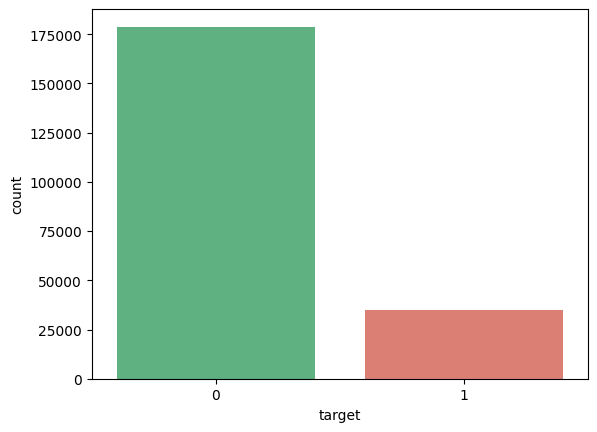

In [151]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x=df['target'], palette=[green, red])

<Axes: xlabel='feature_4'>

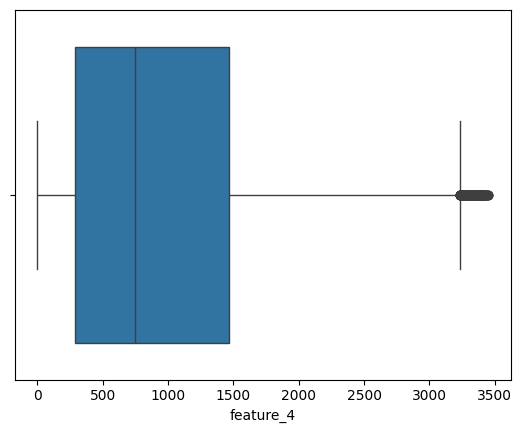

In [153]:
sns.boxplot(x=df["feature_4"])

<Axes: xlabel='feature_5'>

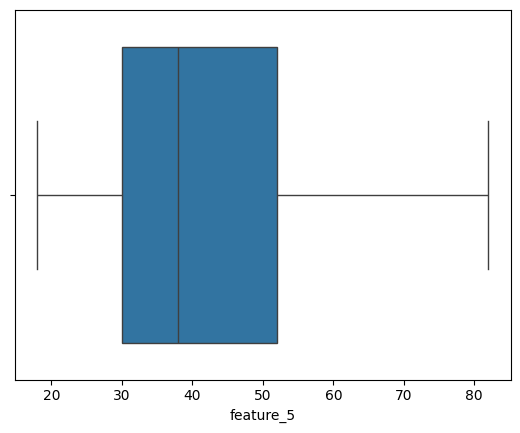

In [154]:
sns.boxplot(x=df["feature_5"])

<Axes: xlabel='feature_120'>

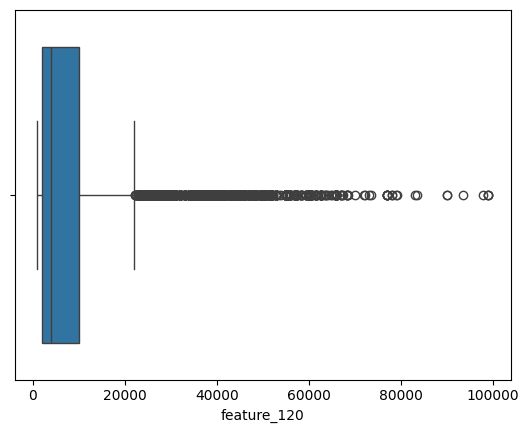

In [155]:
sns.boxplot(x=df["feature_120"])

<Axes: xlabel='feature_122'>

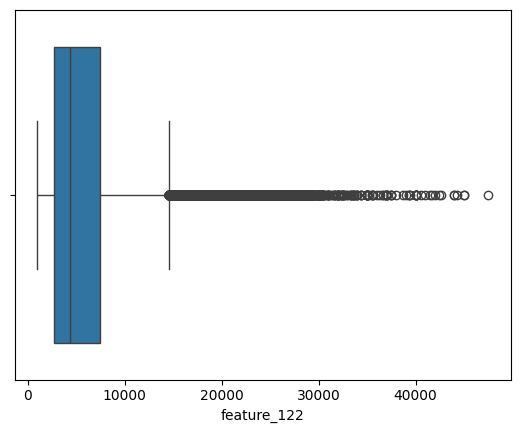

In [156]:
sns.boxplot(x=df["feature_122"])

## Что делать, если данных не хватает или они плохого качества? ##

Улучшить качество данных путём аугментации данных.

## Что можно сделать чтобы повысить качество? ##

Аугментировать данные вкраплением качественных экземпляров

# Вопросы по SQL

## 1) За что отвечает символ звёздочка (*) в SQL-запросе select?

"*" Означает что выбираются все данные из таблицы

## 2) Чем отличается оператор union от оператора join?

Они пишутся и используются по разному, в случае union выдается одна таблица с объедененными значениями в случае join выдаётся сводная таблица

## 3) Чем отличается union от union all?

union объедегяет только часть данные union all объеденяет все данные в 1 таблицу

## 4) Расставьте в хронологическом порядке операции над БД выполняемые в следующем запросе, написав номер операции над ней в таблице ниже::

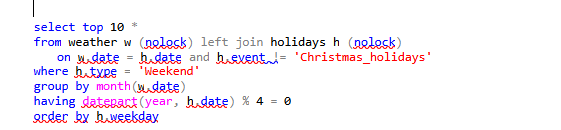

Предлагаю свой запрос на postgressql

select *
from train_sets.all_set_weather
left join train_sets.all_set_business on train_sets.all_set_weather.hi = train_sets.all_set_business.hi 
where train_sets.all_set_weather.hi = 0
order by random() limit 500

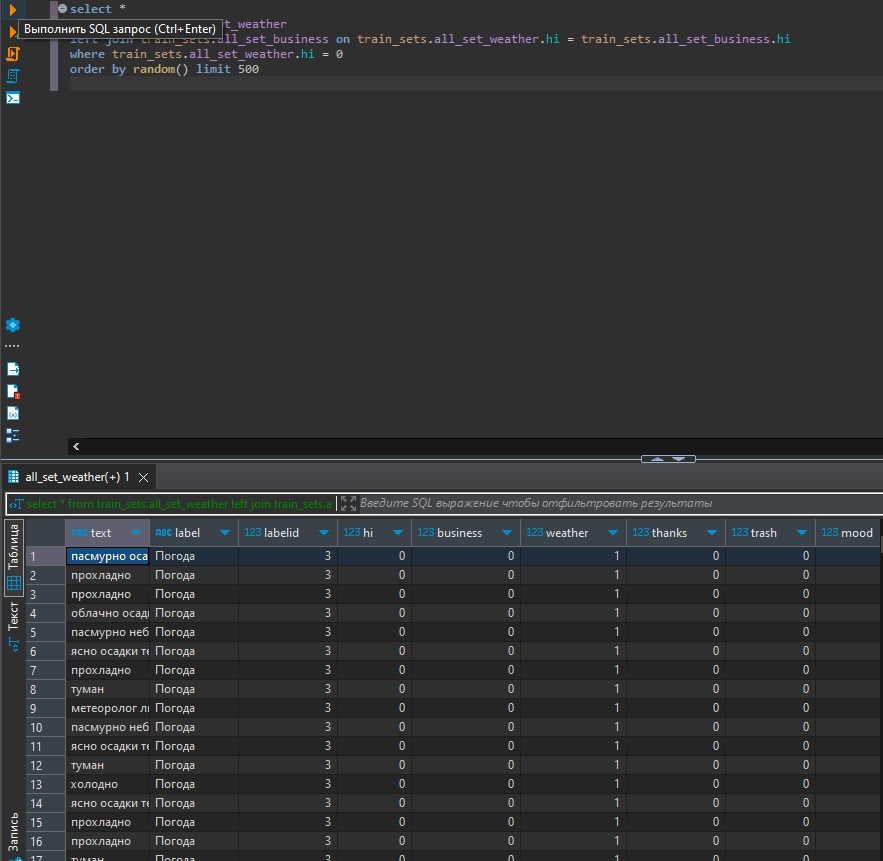

## 5) Если имеются две таблицы с совпадающими названиями полей (например таблицы Weather с полем date и таблица Holidays с полем date), объединенный join-ом по некоторому полю != date ,  а нужно вывести результат только одной таблицы. Каким образом это указывается в запросе?

Использовать union или union all

## 6) Какая конструкция будет (в среднем) выполняться быстрее:

* select
	Клиент,
	case when Источник_клиента = 'интернет-заявка'
		then '1'
		when Источник_клиента = 'оффлайн'
		then '2'
	end "Категория клиента"
from Clients (nolock)

* select
	Клиент,
	1 as Категория клиента
from Clients (nolock)
where Источник_клиента = 'интернет-заявка'
 union all 
select
	Клиент,
	2 as Категория клиента
from Clients (nolock)
where Источник_клиента = 'оффлайн'

Вторая конструкция выполняется быстрее тк там стоит nolock но разница невелика

## 7) Имеются 2 поля  в формате datetime, но из-за неудачного проектирования запись идет таким образом, что в одном поле дата, но без времени, а в другом поле – время, но без даты, нужно получить одно поле в котором будет и дата и время:

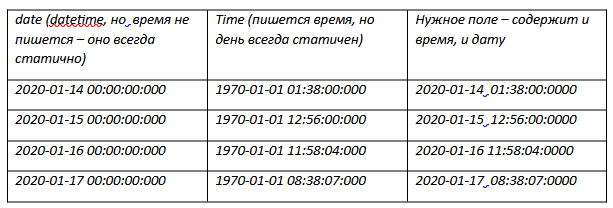

Создать поле датавремя, перепроектировать систему

## 8) Что является более быстрым при прочих равных  при select-запросе из двух объединенных таблиц – указание условий в блоке join или указание условий в блоке where?

Указание в блоке join. На практике таким не занимался.

## 9) Чем отличается raw_number от rank?

Функция ROW_NUMBER() присваивает уникальный идентификатор каждой строке результата запроса. В качестве оператора используется OVER(), он определяет условия разбиения на партиции и устанавливает правила сортировки записей.

Основное различие между функциями RANK() и DENSE_RANK() заключается в способе присвоения рангов записям в упорядоченном наборе данных. RANK() творит "пробелы" в ранжированном списке после группы совпадающих значений (например, 1, 1, 3), тогда как DENSE_RANK() продолжает ранжирование без пропусков (например, 1, 1, 2).

## 10) Какой командой можно вернуть все строки таблице, где поле Comment содержит хотя бы пробел или пустое выражение (но не NULL):
Пример таблицы

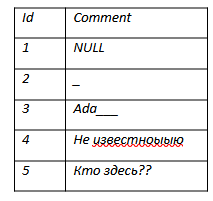

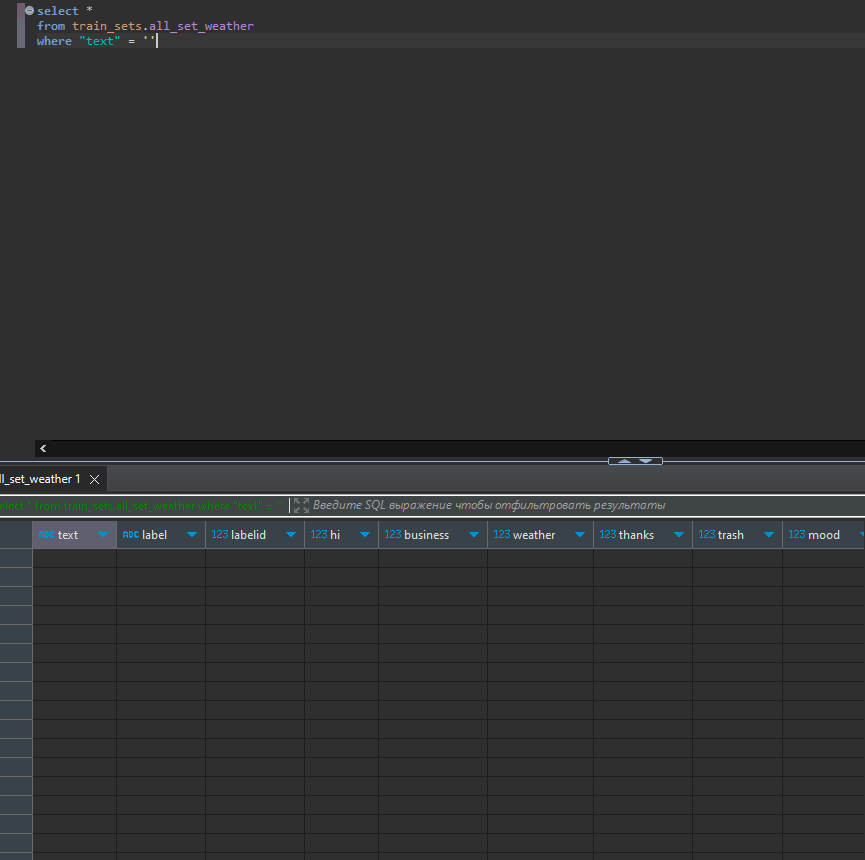

## 11) Напишите условие, которое вернет все строки, содержащие нижнее подчеркивание в поле Comment ##

select "Comment" from messtorage.test where "Comment" like '%_%'

## 12) Перед вами таблица и запрос, формирующий, поле «Сумма» , которое  должно содержать сумму значений полей «Проценты»  и «Основной долг». При этом поля «Проценты»  и «Основной долг» не заполнялись  значениями, если оплат не поступало.

Какая была допущена ошибка при формировании поля Сумма, на ваш взгляд и как её исправить?

select проценты + "Основной долг" as "Сумма" from messtorage.test

Схема была не указана, указал схему где находится таблица

## 13) Напишите запрос, возвращающий последнее действие клиента в хронологическом порядке  на веб-странице в виде таблицы «Клиент такой-то» - «Переход на вкладку Займы»

select "Action" from messtorage.test ORDER by "Date_time" ASC

## 14) Имеется таблица 
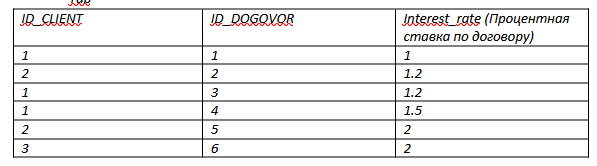  
Напишите запрос, который выведет список клиентов (без повторений), у которых процентная ставка больше 1.3% 

select id_client from messtorage.test where interest_rate > 1.5

## 15) Напишите запрос, подсчитывающий по таблице из предыдущего задания, сколько у каждого из клиентов договоров

select count(id_dogovor) from messtorage.test

## 16) Имеются две таблицы: Dogovor (список договоров клиентов, уникальный ключ ID – номер договора)  и Clients (содержит персональные данные клиента, уникальный ключ – ID- идентификатор клиента):

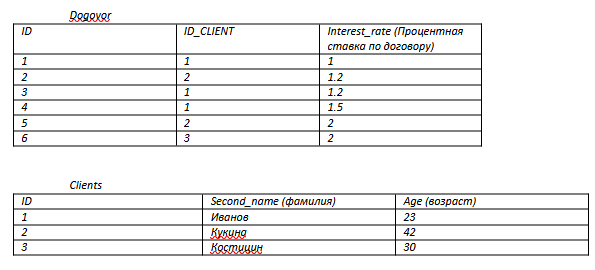

Напишите запрос, который вернет номера  договоров тех клиентов, которым больше 25 лет

select messtorage.dogovor.id from messtorage.dogovor full outer join messtorage.clients on messtorage.clients.id = messtorage.dogovor.id_client where messtorage.clients.age > 25

## 17) Имеются две таблицы, смысл таблиц не имеет  значения

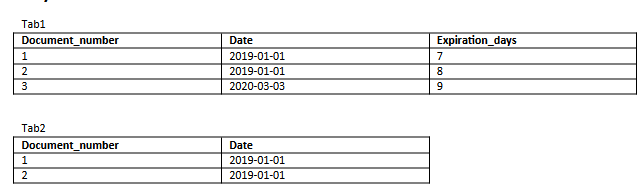

Имеется запрос по left join таблицы Tab2 к таблице Tab1 по полю Date (есть в обеих таблицах), благодаря которому возвращаются столбцы обеих таблиц (все):
Запрос написан в виде:
Select
	Tab1.Date
	,Tab1.Document_number as “Первый документ”
	,Tab2.Document_number as “Второй документ”
From
	Tab1
	Left join
	Tab2
	On Tab1.Date = Tab2.Date
Подумайте, сколько строк будет в результате его выполнения:

5

Нарисуйте таблицу с результатом

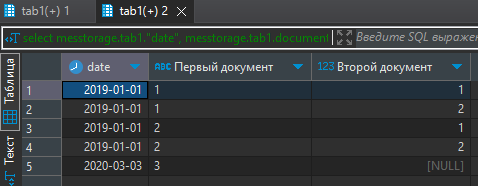

Будут ли пустые значения (NULL) хоть в каком-нибудь поле?

Да

Сколько будет строк, если left join заменить на inner join 

4

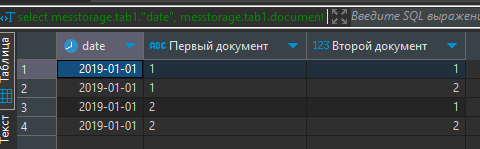

## 18) Имеется таблица по клиентам и договорам, заключенным с ними, напишите команду (часть запроса), которая бы проставляла порядковый номер договора по каждому клиенту

Пример таблицы и поля, в котором проставляется порядковый номер договора по клиенту

## 19) Напишите конструцию (часть запроса), которая считает число дней просрочки клиента по следующей таблице (а если клиент погасил ранее, чем дата по договору, должен проставляться нолик – нет просрочки)

## 20) Имеется таблица по списку договоров клиентов, в ней есть поле D_DATEINPUT с датой заключения договора в формате “2019-05-01 18:12:15” типа datetime

Напишите команду для отделения от даты месяца (в каком виде будет возвращаться месяц – May или «05» или «5» - не имеет значения)

SELECT EXTRACT(MONTH FROM date) AS month FROM messtorage.tab2;

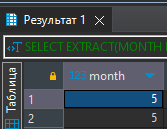

## 21) Преобразуйте запись в формате строки ’30-01-2020’ в дату

select TO_DATE('30-01-2020', 'DD-MM-YYYY')

## 22) Какие существуют функции, позволяющие представить запись формата datetime (например, 20181031 00:00:00:012) 
    • в строку нужного вида (например ’31 октября 2018’) 

    • в запись того же формата datetime, но в нужном виде (например 31.10.18) 

TO_TIMESTAMP()

## 23) За что отвечает команда GO в SQL?

Программы SQL Server интерпретируют команду GO как сигнал о том, что им следует отправить текущий пакет инструкций Transact-SQL экземпляру SQL Server. 

## 24) С помощью какой команды можно завести переменную?

\set user_id 10SELECT * FROM messtorage.tab2 WHERE messtorage.tab2.document_number = :user_id;;

В случае работы с графическим интерфейсом сет можно опустить и задать переменную дополнительно

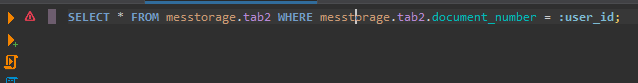

## 25) Какие бывают типы данных в SQL?

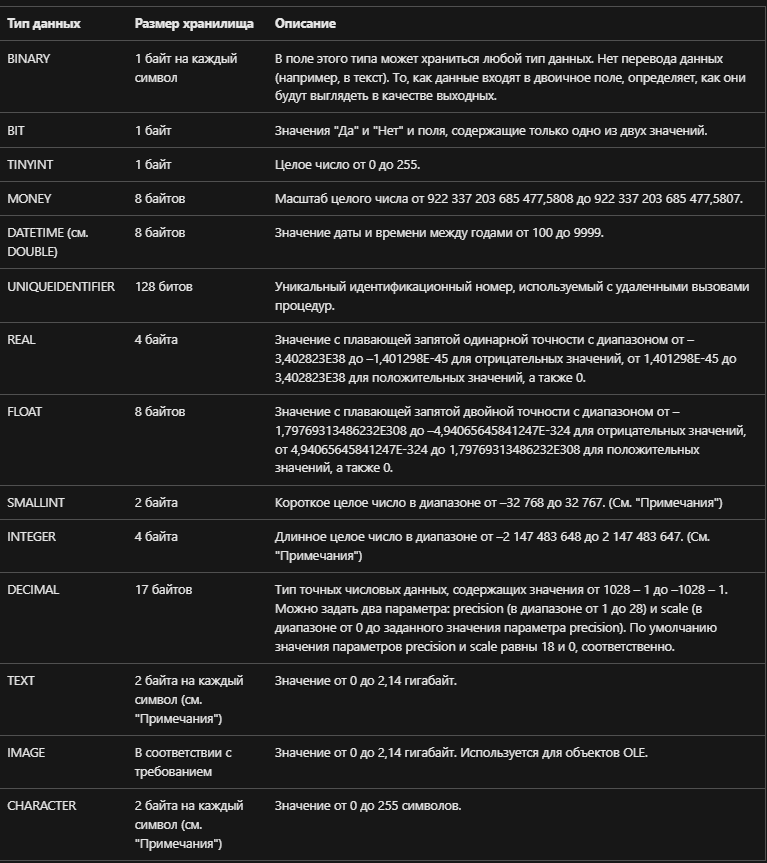

## 26) Соотнесите команды SQL с их смысловой нагрузкой:

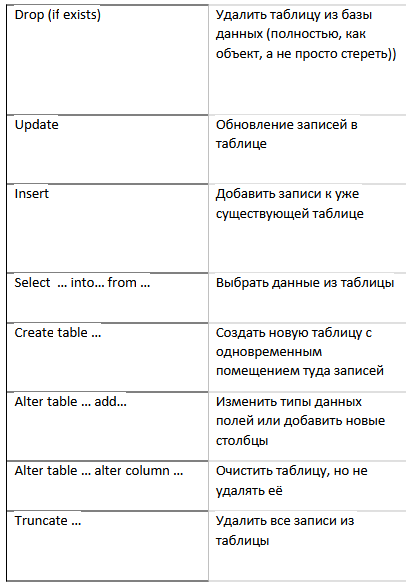

## 27) Как сделать так, чтобы команды в SQL-скрипте выполнялись пошагово, а не одновременно? (например при создании таблицы, добавлении полей и изменения их типов)

Как вариант использовать GO для переключения строки запроса на строку

## 28) Вернет ли ошибку нижеприведенный запрос или отработает без ошибок:

declare @name varchar = 'Nikolay'
select * from Clients_offline where Name = @name
GO
select * from Clients_online where Name = @name 

Написал аналогичный запрос отработал без ошибок